In [1]:
# Task 2: Feature Engineering, Model Optimization & Performance Comparison

Machine Learning task using the California Housing dataset.

Objectives:
- Apply feature scaling
- Train multiple regression models
- Compare model performance using RMSE and R²


SyntaxError: invalid character '²' (U+00B2) (2340090013.py, line 8)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]


array([[-0.326196  ,  0.34849025, -0.17491646, -0.20836543,  0.76827628,
         0.05137609, -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, -0.12853018, -0.09890135,
        -0.11736222, -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, -0.25753771, -0.44981806,
        -0.03227969, -0.46014647, -0.44760309],
       [-1.01786438,  0.58654547, -0.60001532, -0.14515634, -0.00743434,
         0.07750687, -1.38217186,  1.23269811],
       [-0.17148831,  1.14200767,  0.3490073 ,  0.08662432, -0.48587717,
        -0.06883176,  0.5320839 , -0.10855122]])

In [8]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R2:", lr_r2)


Linear Regression RMSE: 0.7455813830127762
Linear Regression R2: 0.575787706032451


In [9]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

ridge_pred = ridge.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R2:", ridge_r2)


Ridge Regression RMSE: 0.745556744281478
Ridge Regression R2: 0.5758157428913682


In [10]:
dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree RMSE:", dt_rmse)
print("Decision Tree R2:", dt_r2)


Decision Tree RMSE: 0.6496502038503689
Decision Tree R2: 0.6779284983766045


In [11]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree"],
    "RMSE": [lr_rmse, ridge_rmse, dt_rmse],
    "R2 Score": [lr_r2, ridge_r2, dt_r2]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,0.745581,0.575788
1,Ridge Regression,0.745557,0.575816
2,Decision Tree,0.649650,0.677928


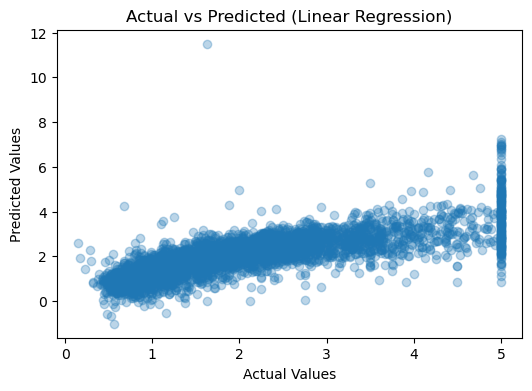

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, lr_pred, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


In [13]:
## Conclusion

- Feature scaling significantly improves Linear and Ridge Regression performance.
- Ridge Regression performs slightly better than basic Linear Regression.
- Decision Tree captures non-linear patterns but may overfit.
- Ridge Regression offers the best balance between bias and variance for this task.

This task demonstrates feature engineering, model optimization, and performance comparison.


SyntaxError: invalid syntax (3966666848.py, line 3)

In [18]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree"],
    "RMSE": [lr_rmse, ridge_rmse, dt_rmse],
    "R2 Score": [lr_r2, ridge_r2, dt_r2]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,0.745581,0.575788
1,Ridge Regression,0.745557,0.575816
2,Decision Tree,0.649650,0.677928
